In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
def quantile_scale(df,feats):
    qua = df
    scaler = QuantileTransformer(
        n_quantiles=10,
        random_state=42,
        ignore_implicit_zeros=True, #sparse matrix
    )
    # fit the scaler
    scaler.fit(qua[feats])
    # transform values
    qua[feats] = scaler.transform(qua[feats])
    return qua

from datetime import datetime
def timestamp(): return datetime.today().strftime('%Y%m%d')

%matplotlib inline

In [2]:
tech = pd.read_csv("../RESULTS/gbbo.techinical.data.20190909.tsv",sep="\t")
tech.head()

,season,baker,index,episode,tech_mean,tech_med,tech,place
0,1,Annetha,6,1,2.00,2.0,2,6
1,1,Annetha,6,2,4.50,4.5,7,6
2,1,Annetha,6,3,3.00,2.0,0,6
3,1,Annetha,6,4,2.25,1.0,0,6
4,1,Annetha,6,5,1.80,0.0,0,6


In [3]:
star = pd.read_csv("../RESULTS/gbbo.starbaker.data.20190909.tsv",sep="\t")
star.head()

,season,baker,index,episode,mean_star,star,mean_good,good,mean_bad,bad,place
0,1,Annetha,6,1,0.0,0,1.00,1,0.00,0,6
1,1,Annetha,6,2,0.0,0,0.50,0,0.50,1,6
2,1,Annetha,6,3,0.0,0,0.33,0,0.33,0,6
3,1,Annetha,6,4,0.0,0,0.25,0,0.25,0,6
4,1,Annetha,6,5,0.0,0,0.20,0,0.20,0,6


#### Merge the two data frames
----------------------------
* tech / tech_mean: technical challenge ranking and running mean
* star / star_mean: baker won star baker for that episode and running mean of times named star baker
* good / good_mean: baker favored by judges for that episode and running mean of times favored
* bad  / bad_mean : baker unfavored by judges for that episode and running mean of times unfavored 

In [10]:
merge_col = ['season','baker','index','episode','place']
gbbo = pd.merge(tech, star,  how='left', left_on=merge_col, right_on =merge_col)
gbbo = gbbo[['season','baker','episode','place','tech_mean','tech','mean_star','star','mean_good','good','mean_bad','bad']]
gbbo.to_csv("../RESULTS/gbbo.features.{}.tsv".format(timestamp()),sep="\t",index=False)
gbbo.head()

,season,baker,episode,place,tech_mean,tech,mean_star,star,mean_good,good,mean_bad,bad
0,1,Annetha,1,6,2.00,2,0.0,0,1.00,1,0.00,0
1,1,Annetha,2,6,4.50,7,0.0,0,0.50,0,0.50,1
2,1,Annetha,3,6,3.00,0,0.0,0,0.33,0,0.33,0
3,1,Annetha,4,6,2.25,0,0.0,0,0.25,0,0.25,0
4,1,Annetha,5,6,1.80,0,0.0,0,0.20,0,0.20,0


/Users/tacitus/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2088: UserWarning: 'ignore_implicit_zeros' takes effect only with sparse matrix. This parameter has no effect.
  warnings.warn("'ignore_implicit_zeros' takes effect only with"
/Users/tacitus/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


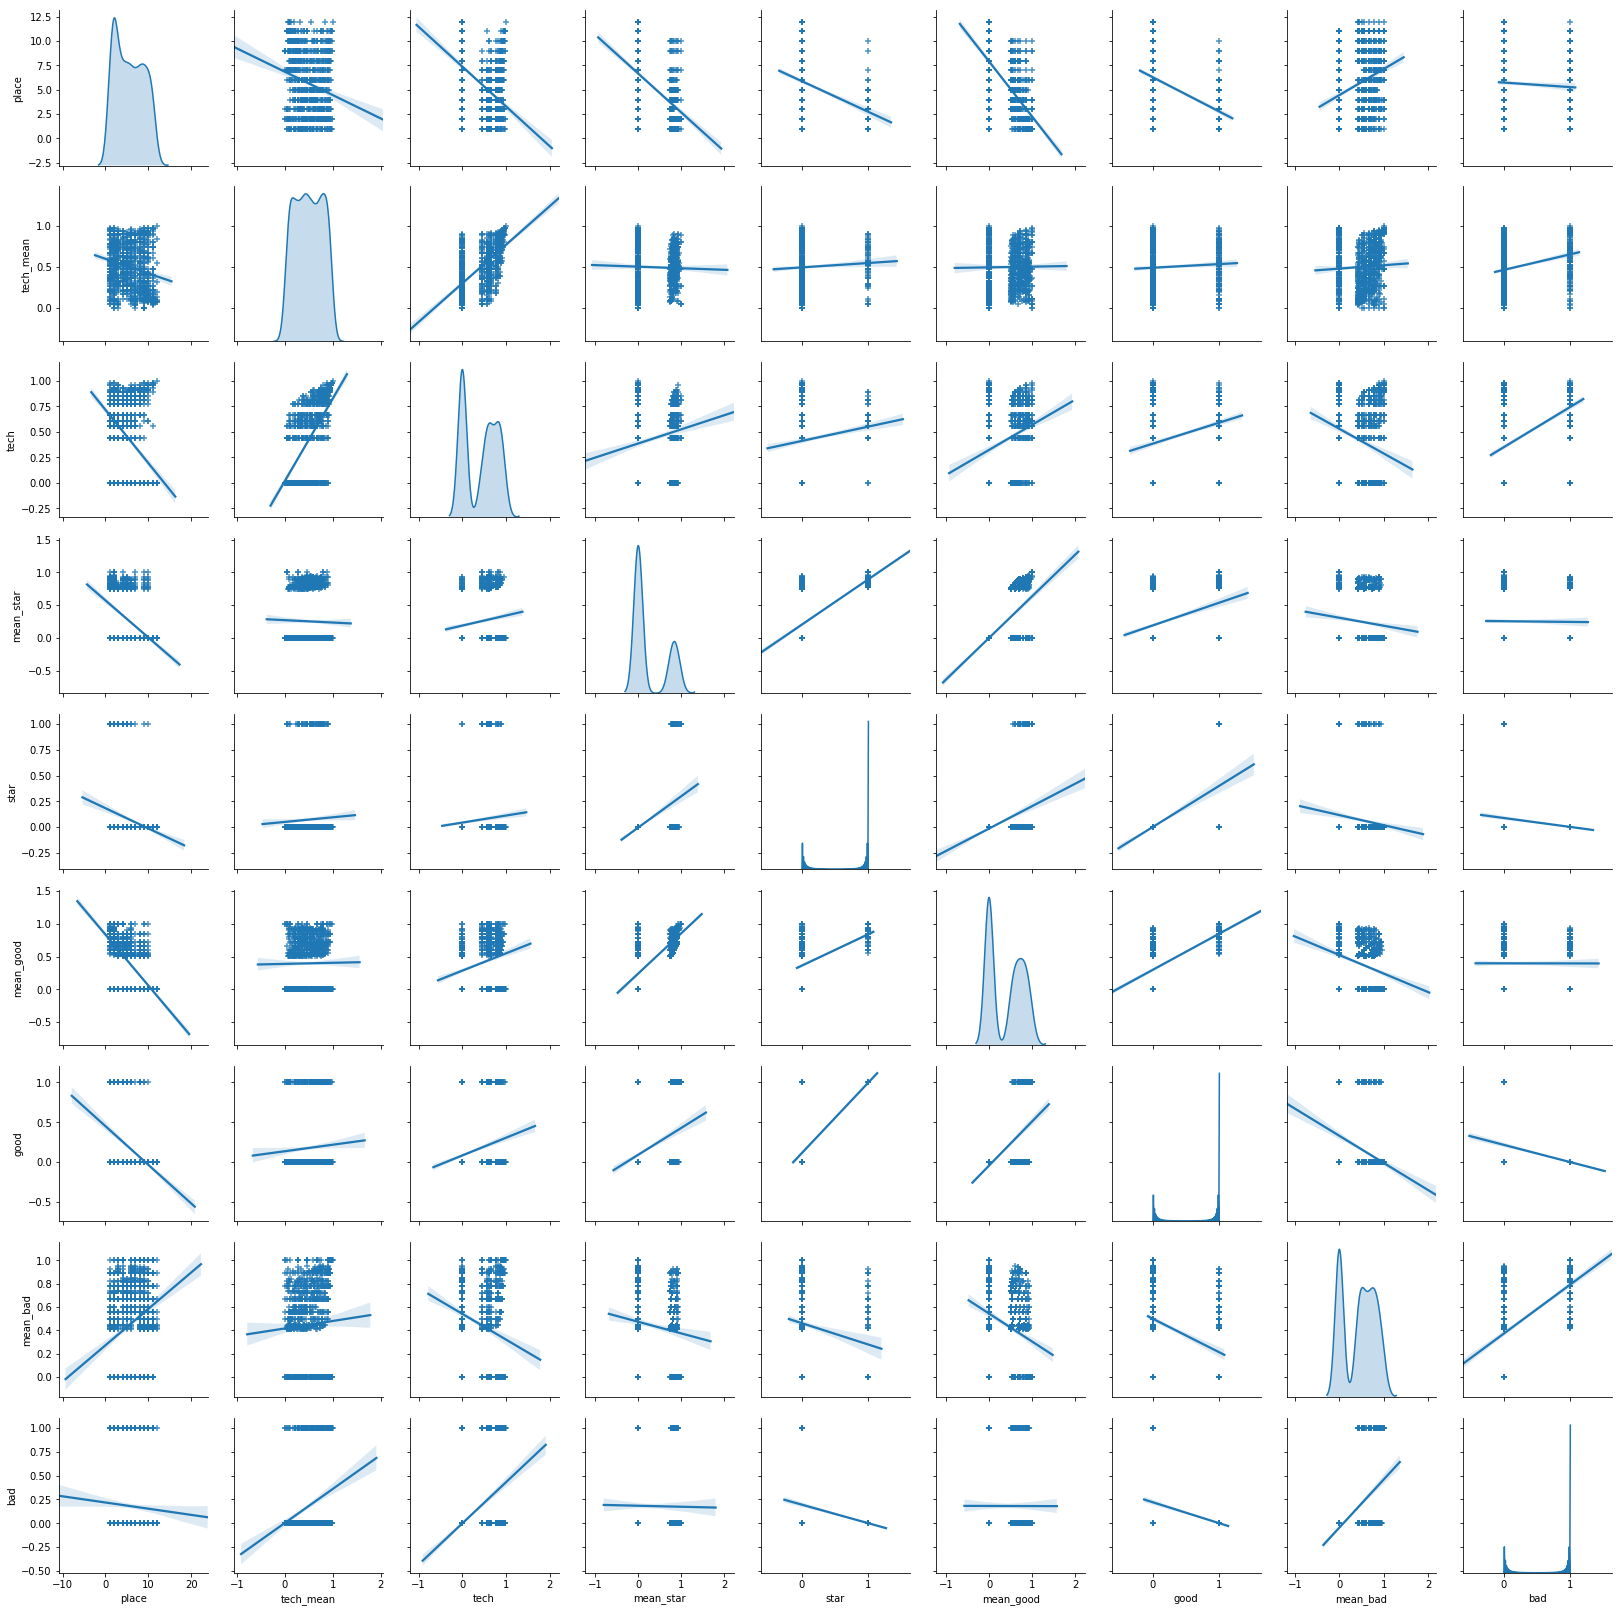

In [11]:
feats = ['tech_mean','tech','mean_star','star','mean_good','good','mean_bad','bad']
df = quantile_scale(gbbo,feats)
sns.pairplot(
    df,
    vars=['place']+feats,
    kind='reg',
    markers='+',
    diag_kind='kde'
)